In [12]:
import gym
import numpy as np
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
from run_test import *
from baselines.common.trex_utils import preprocess

from cnn import Net
import atari_head_dataset as ahd
import utils
from LearnAtariRewardGaze import create_training_data

In [13]:
env_name = 'asterix'
env_id = env_name[0].upper() + env_name[1:] + "NoFrameskip-v4"
env_type = "atari"
min_snippet_length = 50 #min length of trajectory for training comparison
maximum_snippet_length = 100
stochastic = True

seed = 0
torch.manual_seed(seed)
np.random.seed(seed)
tf.set_random_seed(seed)

env = make_vec_env(env_id, 'atari', 1, seed,
                       wrapper_kwargs={
                           'clip_rewards':False,
                           'episode_life':False,
                       })


env = VecFrameStack(env, 4)

In [14]:
data_dir = '../../learning-rewards-of-learners/data/atari-head/'
dataset = ahd.AtariHeadDataset(env_name, data_dir)
load_path = 'learned_models/asterix_expert_conv1_KL'

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

use_gaze = True
gaze_conv_layer = 1
use_motion = False
gaze_loss_type = 'KL'
gaze_dropout = False
num_trajs = 0 # number of full trajectories (only used for enduro)
num_snippets = 6000

../../learning-rewards-of-learners/data/atari-head/
env name:  asterix
valid trials: ['246_RZ_721092_Feb-20-21-52-26', '243_RZ_593078_Feb-19-10-19-29', '213_RZ_7141559_Jan-10-11-40-48', '260_RZ_1456515_Mar-01-10-10-36']
valid trial nums: [246, 243, 213, 260]


In [15]:
demonstrations, learning_returns, learning_rewards, learning_gaze = utils.get_preprocessed_trajectories(env_name, dataset, data_dir, use_gaze, gaze_conv_layer, use_motion)
reward_net = Net(gaze_dropout, gaze_loss_type)
reward_net.load_state_dict(torch.load(load_path))
#reward_net.eval()
reward_net.to(device)

traj length:  4
Max human score 537500
Min human score 88000
num non duplicate scores 2
len demos:  2
213
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: as

NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: 

243
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GA

NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: 

NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: 

NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: 

NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: 

NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: 

NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: asterix
NOT MASKING SCORE FOR GAME: 

3769 3769 3769
2 2 2


FileNotFoundError: [Errno 2] No such file or directory: 'learned_models/asterix_expert_conv1_KL'

In [ ]:
#sort the demonstrations according to ground truth reward to simulate ranked demos
demo_lengths = [len(d) for d in demonstrations]
print("demo lengths", demo_lengths)
max_snippet_length = min(np.min(demo_lengths), maximum_snippet_length)
print("max snippet length", max_snippet_length)

print(len(learning_returns))
print(len(demonstrations))
print([a[0] for a in zip(learning_returns, demonstrations)])
demonstrations = [x for _, x in sorted(zip(learning_returns,demonstrations), key=lambda pair: pair[0])]
learning_gaze = [x for _, x in sorted(zip(learning_returns,learning_gaze), key=lambda pair: pair[0])]

#print([len(x) for x in demonstrations], [len(y) for y in learning_gaze7])
#exit(0)

sorted_returns = sorted(learning_returns)
print(sorted_returns)

training_data = create_training_data(demonstrations, num_trajs, num_snippets, min_snippet_length, max_snippet_length, learning_gaze, use_gaze)
training_obs, training_labels, training_gaze = training_data

In [ ]:
def get_conv_maps(reward_net, traj):
    print(type(traj))
#     device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    conv_maps_from_obs = []
    with torch.no_grad():
        for s in traj:
            r = reward_net.cum_return(torch.from_numpy(np.array([s])).float(),gaze_conv_layer)
#             print('output of net.cum_return: ',r)
            conv_maps_from_obs.append(r[2])
    return conv_maps_from_obs

In [ ]:
# print(type(demonstrations[0]))
with torch.no_grad():
    conv_maps = [get_conv_maps(reward_net, traj) for traj in demonstrations]
    

In [40]:
import seaborn as sb
import matplotlib.pyplot as plt
conv_map = conv_maps[0]
gaze_map = training_gaze[0]

torch.Size([1, 1, 26, 26])


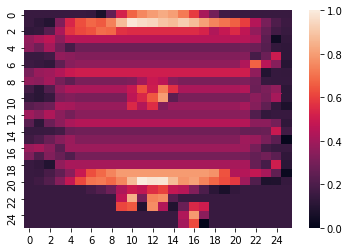

In [30]:
print(conv_map[0].shape)
sb.heatmap(conv_map[0].squeeze().cpu())
plt.show()

<class 'numpy.ndarray'>


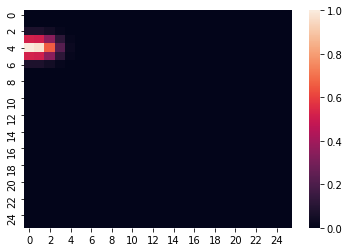

In [43]:
print(type(gaze_map[0][0]))
sb.heatmap(gaze_map[0][0].squeeze())
plt.show()

In [ ]:
plt.imshow(demonstrations[0][0])